# Problem Statement

### X Education has appointed us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Importing Data sets

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing lead dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection

In [4]:
# checking the shape of the data 
lead_data.shape

(9240, 37)

In [5]:
# checking non null count and datatype of the variables
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Describing data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


From the above we can see that there are missing values present in the data

### Data Cleaning

#### 1) Handling the 'Select' level that is present in many of the categorical variables.

We observe that there are 'Select' values in many columns.It could be because the customer did not select any option from the list, hence it shows 'Select'.Therefore, 'Select' values are as good as NULL. So we can convert these values to null values.

In [7]:
# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [8]:
# checking the columns for null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
# Finding the null percentages across columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40 percent.

In [10]:
# dropping the columns with missing values greater than or equal to 40% .
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])

In [11]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

#### 1) Column for 'Specialization'

This column has 37% missing values

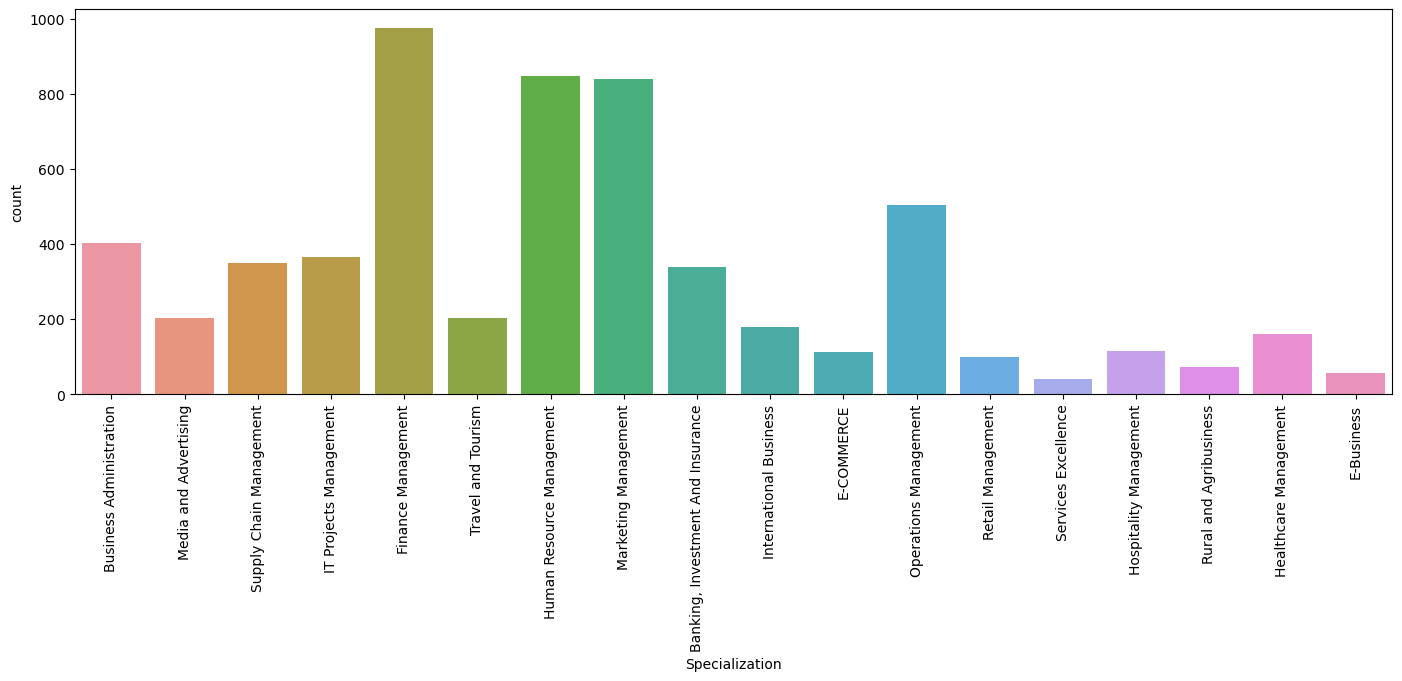

In [12]:
plt.figure(figsize=(17,5))
sns.countplot(x='Specialization', data=lead_data)
plt.xticks(rotation=90)
plt.show()

There is 37% missing values present in the Specialization column.
It could be possible that the lead may leave this column blank if he may be a student or not having any specialization 
or his specialization is not there in the options given. So we can create a another category 'Alternate' for this.

In [13]:
# Creating a separate category called 'Alternate' for this 
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Alternate')

#### 2) Column for 'Tags'

This column has 36% missing values

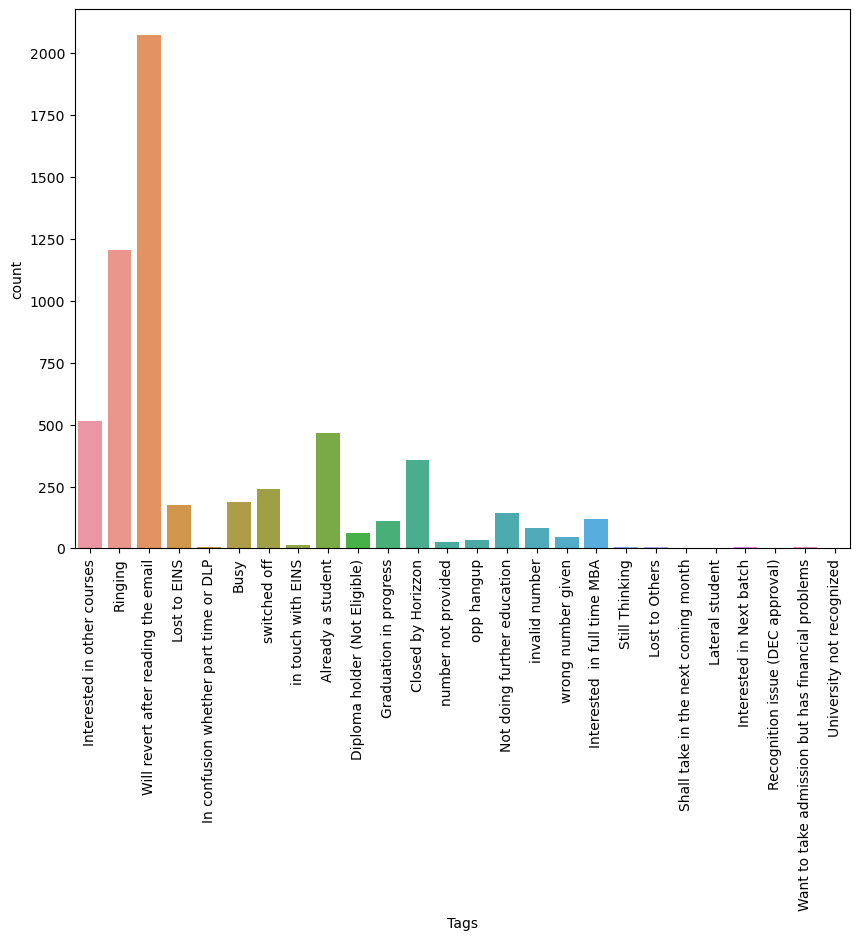

In [14]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(x='Tags', data=lead_data)
plt.xticks(rotation=90)
plt.show()

Since most values are 'Will revert after reading the email' , we can impute missing values in this column with this value.

In [15]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

#### 3) Column for 'What matters most to you in choosing a course'

This column has 29% missing values

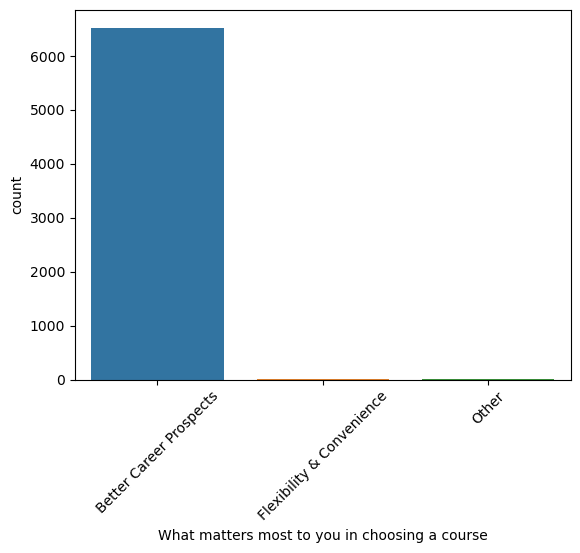

In [16]:
# Visualizing this column
sns.countplot(x='What matters most to you in choosing a course', data =lead_data)
plt.xticks(rotation=45)
plt.show()

In [17]:
# Finding the percentage of the different categories of this column:
round(lead_data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

We can see that this is highly skewed column so we can remove this column.

In [18]:
# Dropping this column 
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

#### 4) Column: 'What is your current occupation'
this column has 29% missing values

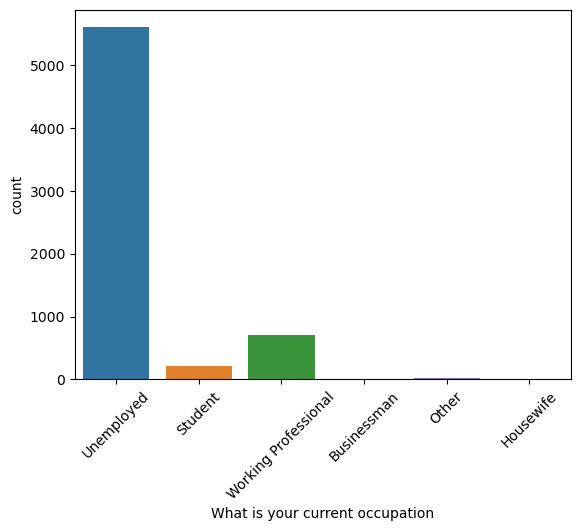

In [19]:
# Visualizing this column
sns.countplot(x='What is your current occupation', data =lead_data)
plt.xticks(rotation=45)
plt.show()

In [20]:
# Finding the percentage of the different categories of this column:
round(lead_data['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

Since the most values are 'Unemployed' , we can impute missing values in this column with this value.

In [21]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

#### 5) Column: 'Country'
This column has 27% missing values

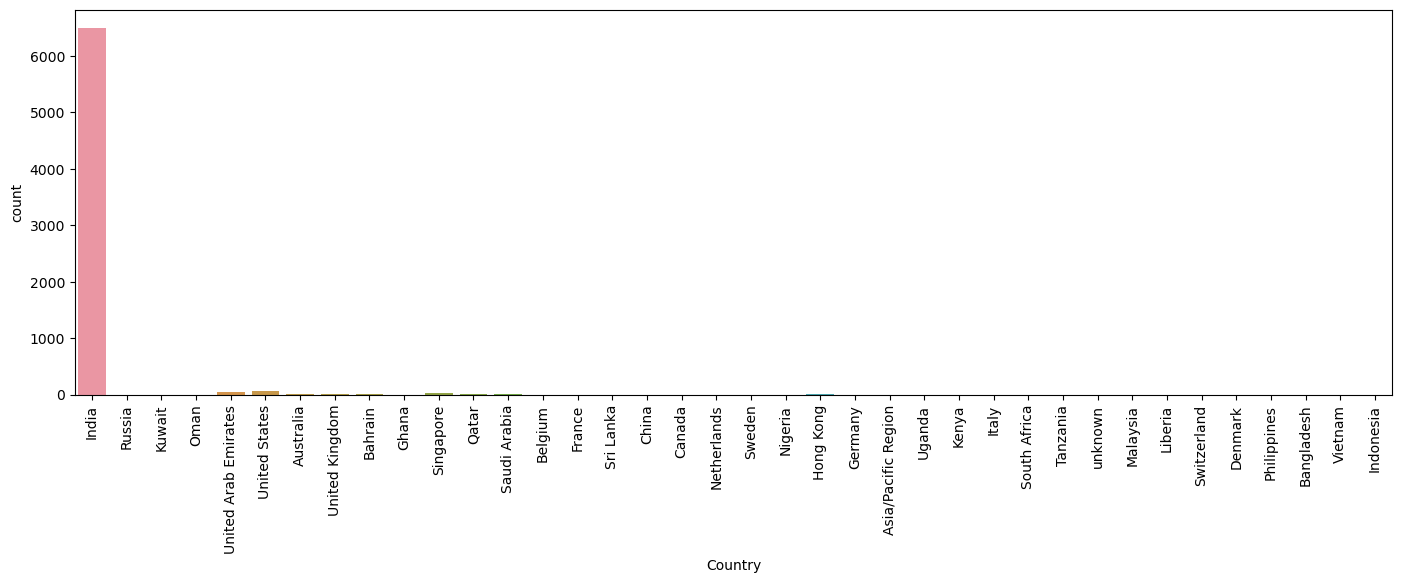

In [22]:
plt.figure(figsize=(17,5))
sns.countplot(x='Country', data= lead_data)
plt.xticks(rotation=90)
plt.show()

We can see that this is highly skewed column but it is an important information w.r.t. to the lead. 
Since most values are 'India' , we can impute missing values in this column with this value.

In [23]:
# Imputing the missing data in the 'Country' column with 'India'
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

#### 6) Column: 'City'
This column has 40% missing values

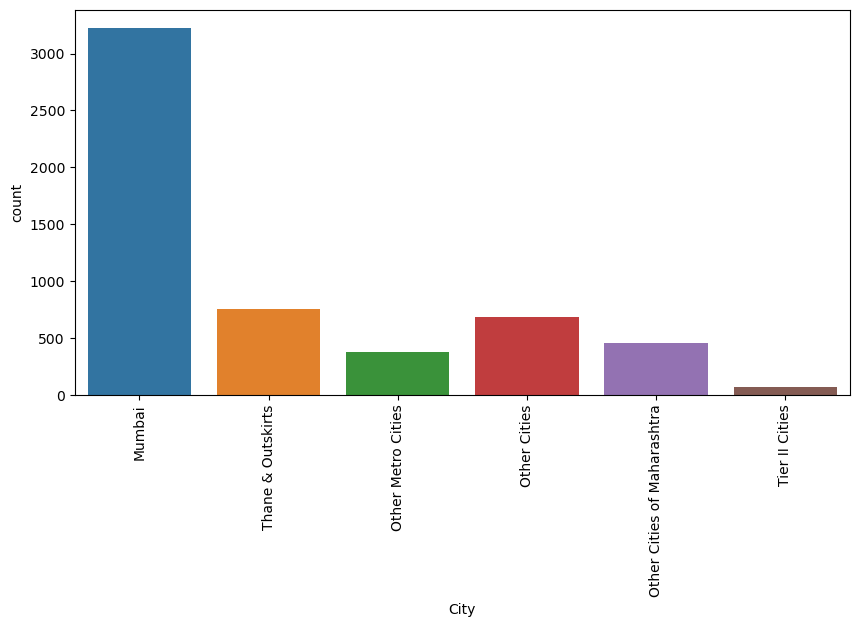

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='City', data=lead_data)
plt.xticks(rotation=90)
plt.show()

In [25]:
# Finding the percentage of the different categories of this column:
round(lead_data['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

Since most values are 'Mumbai' , we can impute missing values in this column with this value.

In [26]:
# Imputing the missing data in the 'City' column with 'Mumbai'
lead_data['City']=lead_data['City'].replace(np.nan,'Mumbai')

In [27]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Rest missing values are under 2% so we can drop these rows.

In [28]:
# Dropping the rows with null values
lead_data.dropna(inplace = True)

In [29]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Now we don't have any missing value in the dataset.

We can find the percentage of rows retained.

In [30]:
# Percentage of rows retained 
(len(lead_data.index)/9240)*100

98.2034632034632

We have retained 98% of the rows after cleaning the data.

## Exploratory Data Analysis

### Checking for duplicates: 

In [31]:
lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


We see there are no duplicate records in our lead dataset.

### Univariate Analysis and Bivariate Analysis

#### 1) Converted

Converted is the target variable, Indicates whether a lead has been successfully converted to 1 or not 0

In [32]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

The lead conversion rate is 38%.

#### 2) Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

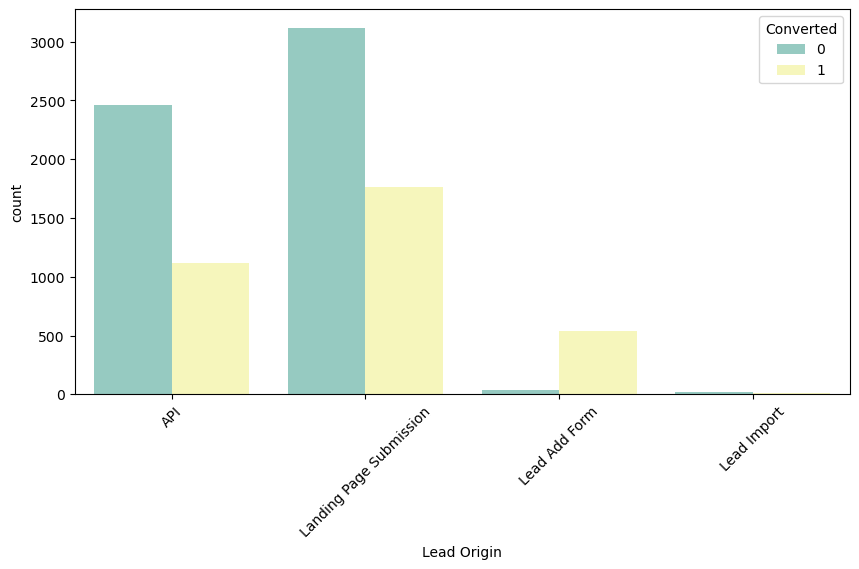

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 45)

#### Conclusion:

1. API and Landing Page Submission have 30-35% conversion rate, however they have a large number of lead originations.
2. Lead Add Form has >90% conversion rate but lower number of leads.
3. Lead Import very less data

#### Therefore, to improve overall lead conversion rate focus should be on improving lead converion of API and Landing Page Submission origin, alongwith generating more leads for Lead Add Form.

#### 3) Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

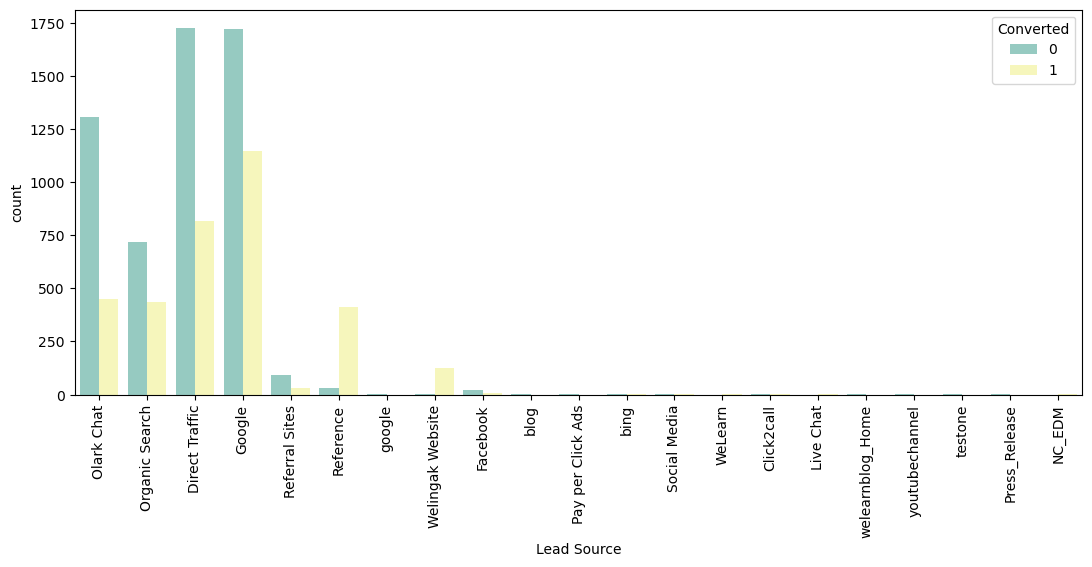

In [34]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Set3')
plt.xticks(rotation = 90)

In [35]:
# Need to replace 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [36]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

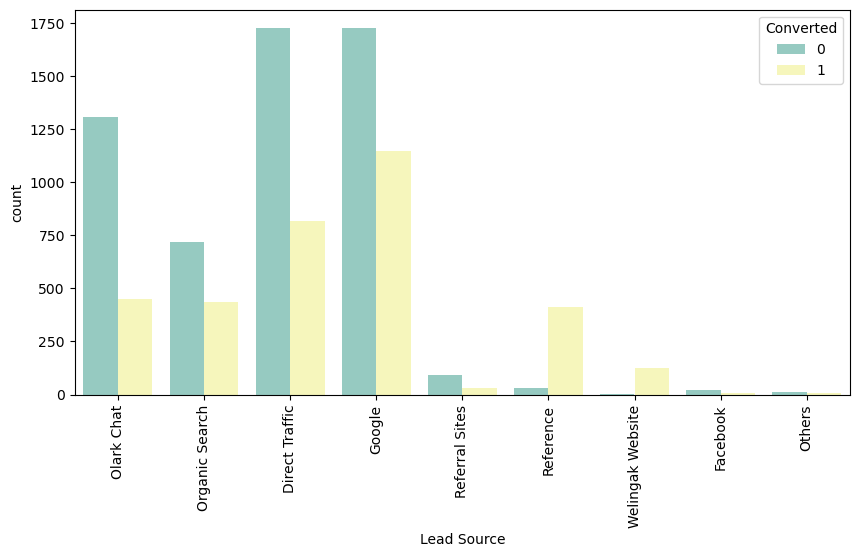

In [37]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### Conclusion:

1. Direct Traffic and Google contribute to the maximum number of leads.
2. Conversion Rate of leads from Reference and Welingak website is high.

#### Therefore, to improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads. While generating more leads from Reference and Welingak website.

#### 4) Do not Email

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

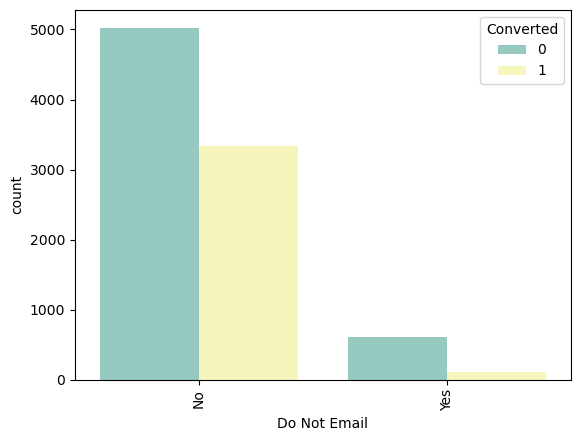

In [38]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### Conclusion
Most entries are 'No'. Therefore, no conclusion can be drawn with this parameter.

#### 5) Do not call

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

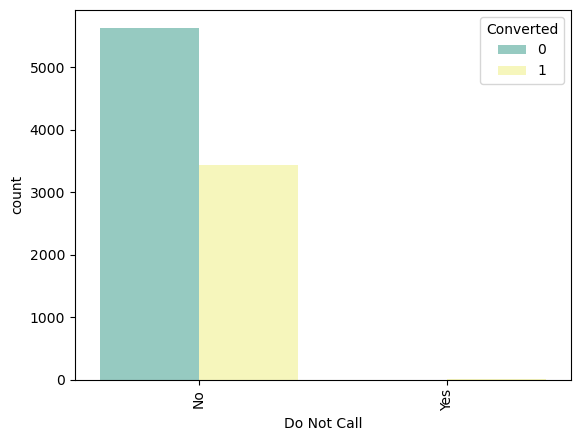

In [39]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### Conclusion
Most entries are 'No'. No Inference can be drawn with this parameter.

#### 6) Total Visits

In [40]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: >

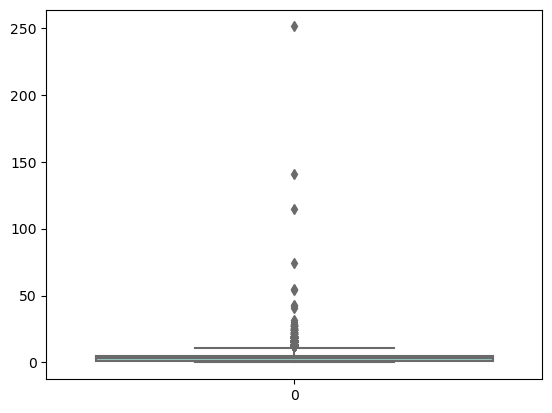

In [41]:
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set3')

**As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.**

In [42]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: >

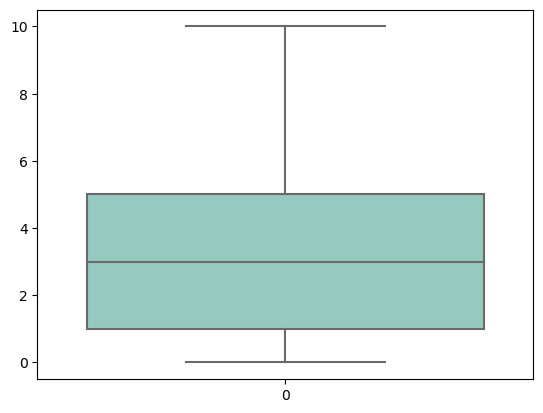

In [43]:
# Visualizing again
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set3')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

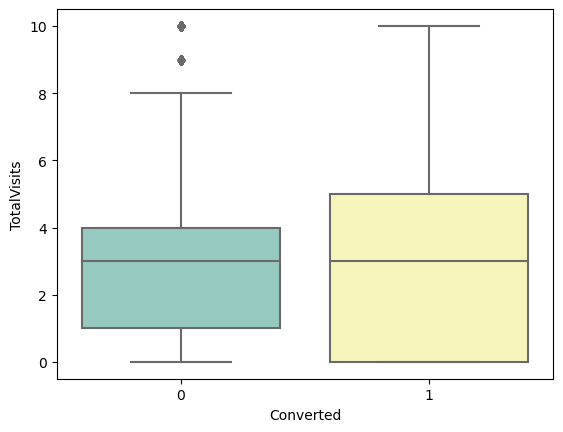

In [44]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data,palette='Set3')

#### Conclusion

Median for converted and not converted leads are the same.
Nothing can be concluded on the basis of Total Visits.

#### 7) Total Time Spent on Website

In [45]:
lead_data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: >

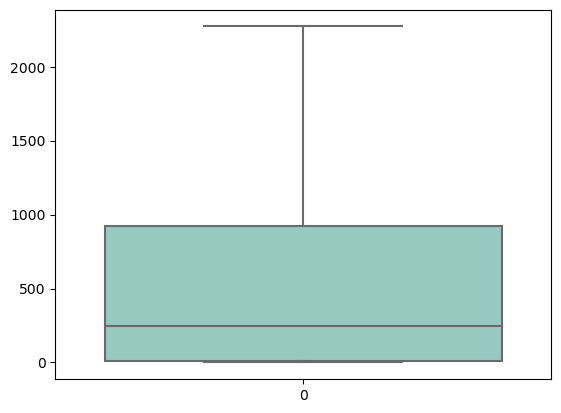

In [46]:
sns.boxplot(lead_data['Total Time Spent on Website'],orient='vert',palette='Set3')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

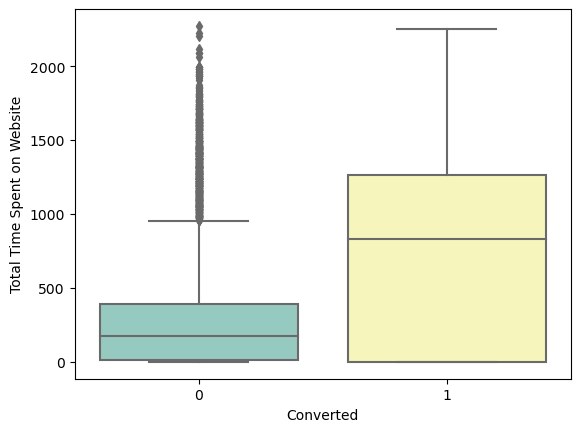

In [47]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data,palette='Set3')

#### Conclusion:

Leads spending more time on the weblise are more likely to be converted.

**Probably website could be made more engaging to make leads spend more time.**

#### 8) Page Views Per Visit

In [48]:
lead_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

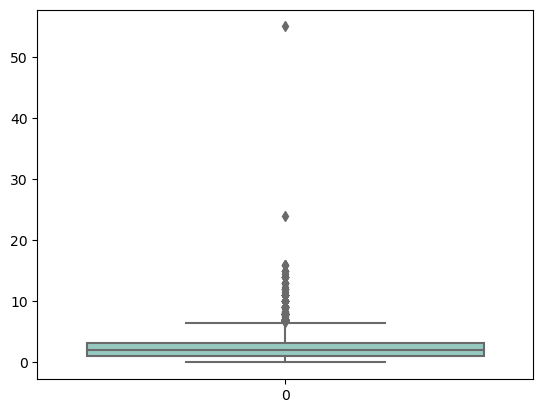

In [49]:
sns.boxplot(lead_data['Page Views Per Visit'],orient='vert',palette='Set3')

**There are a number of outliers in the data. Capping the outliers to 95% value for analysis.**

In [50]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: >

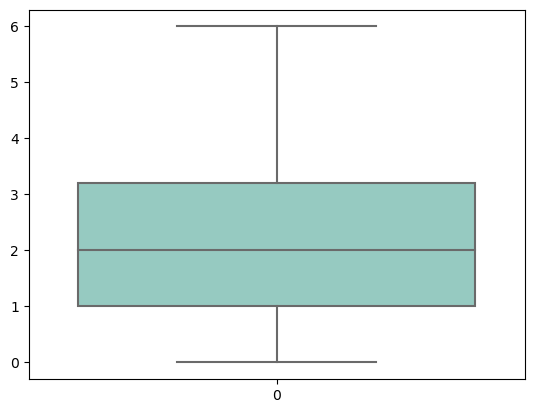

In [51]:
# Visualizing again
sns.boxplot(lead_data['Page Views Per Visit'],palette='Set3',orient='vert')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

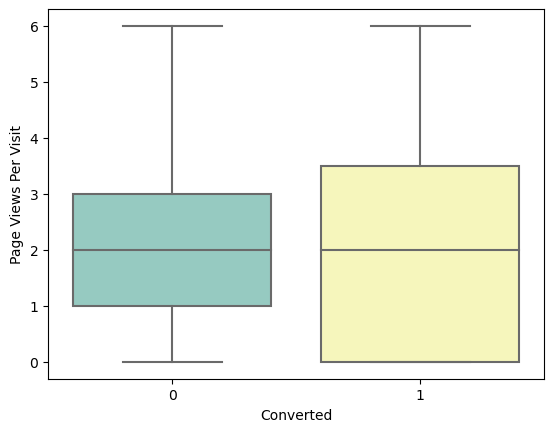

In [52]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_data,palette='Set3')

#### Conclusion

Median for converted and unconverted leads is the same.

**No specific conclusion can be made for lead conversion from Page Views Per Visit**

#### 9) Last Activity

In [53]:
lead_data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

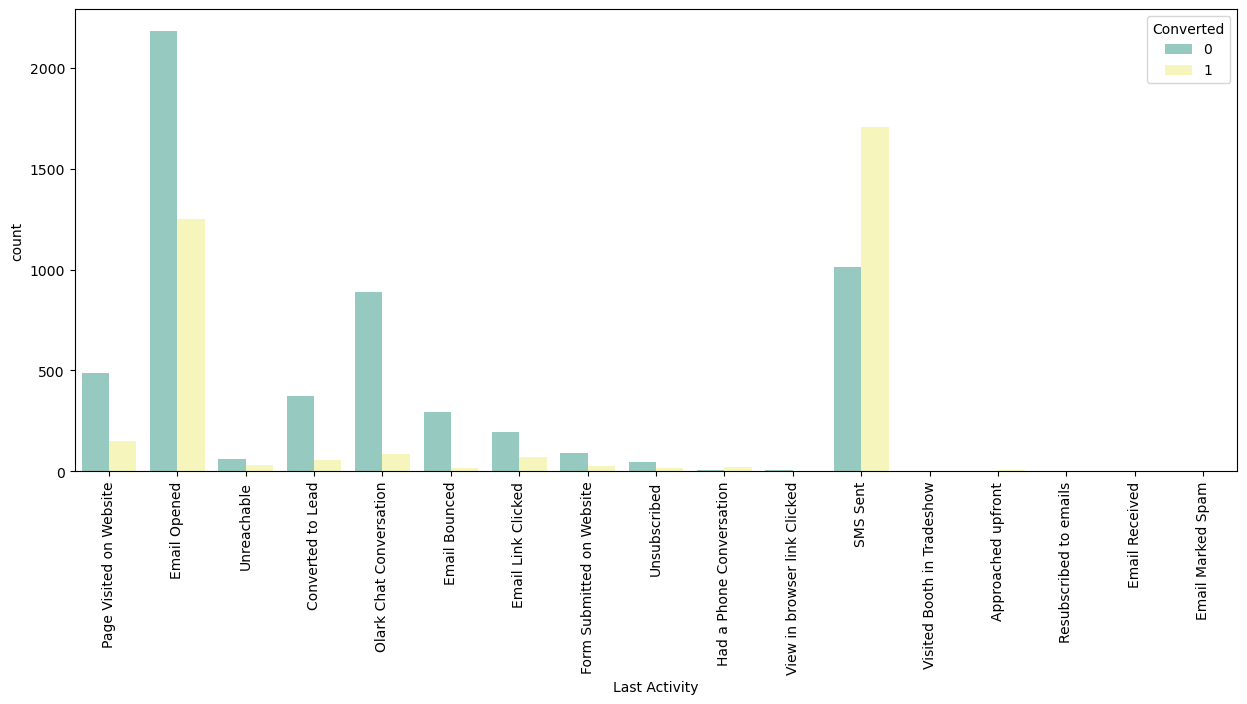

In [54]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

In [55]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

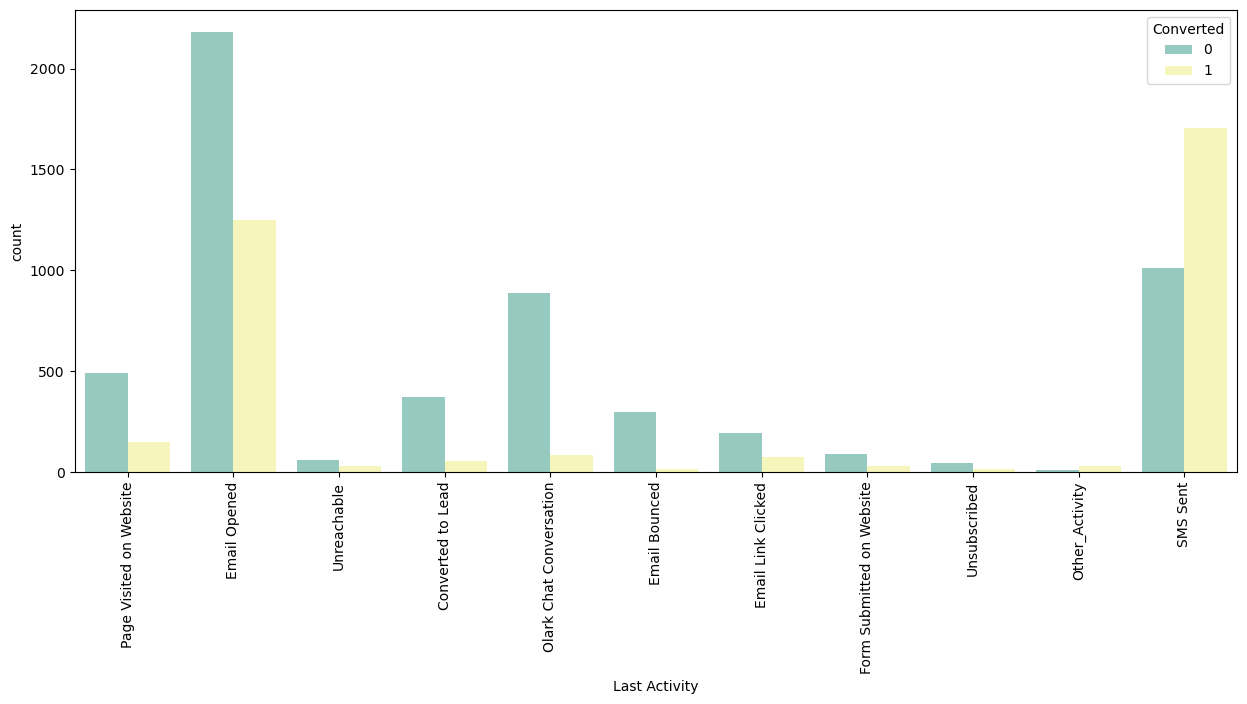

In [56]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### Conclusion

1. Most of the leads have their last activity as 'Email opened'.
2. Conversion rate for leads with last activity as SMS Sent is high.

#### 10) Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

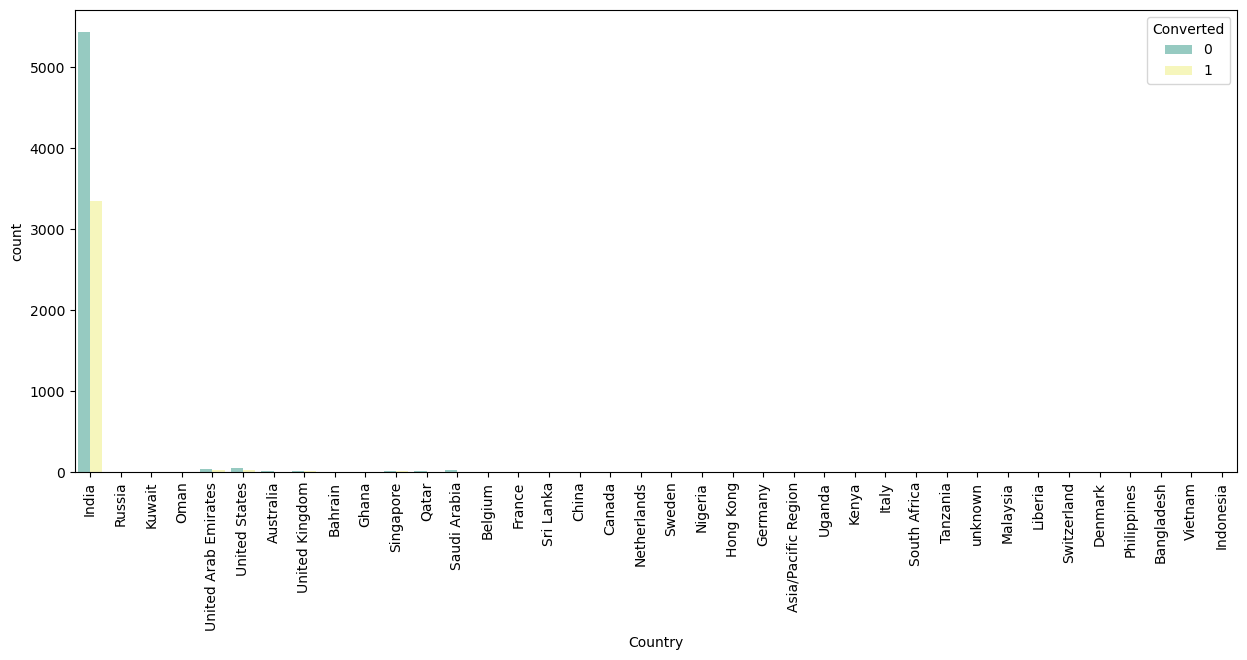

In [57]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### Conclusion

**Most values are 'India' no convlusion can be drawn**

#### 11) Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Alternate'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

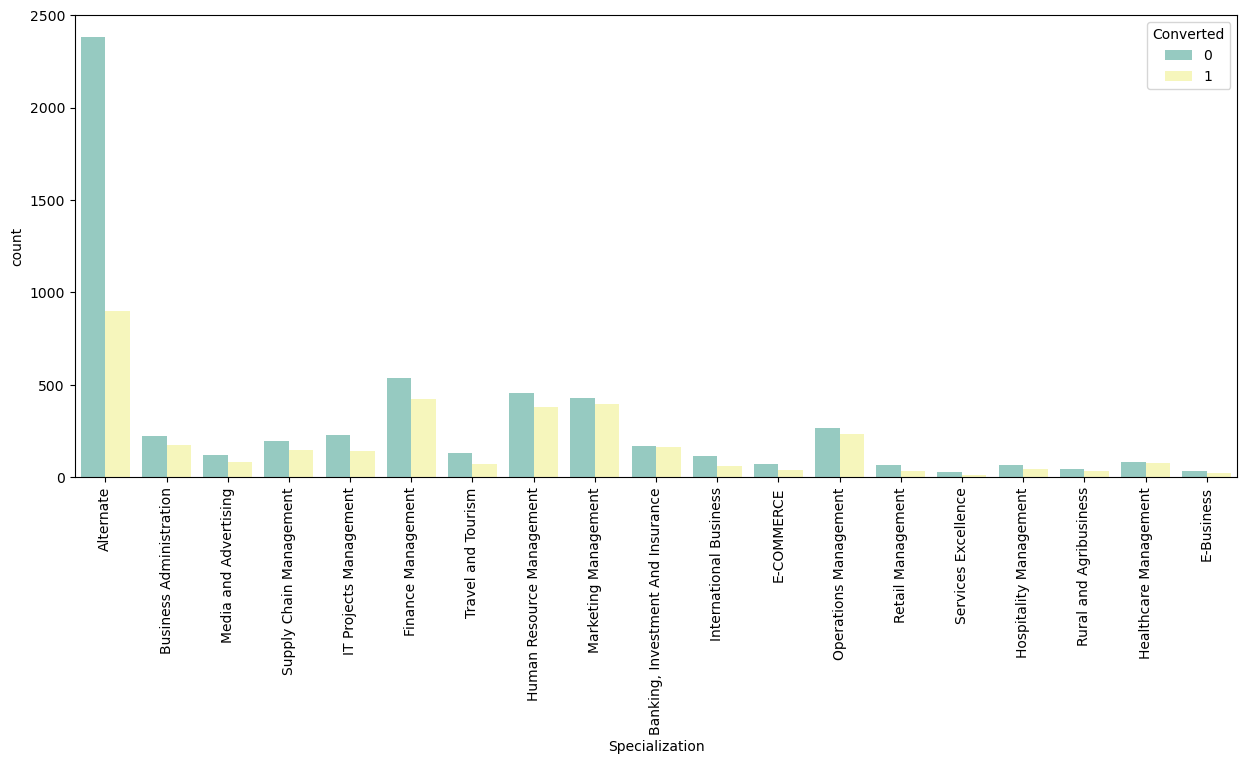

In [58]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### Conclusion

**Higher conversion rate in 'Specialization' should be focused.**

#### 12) What is your current occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

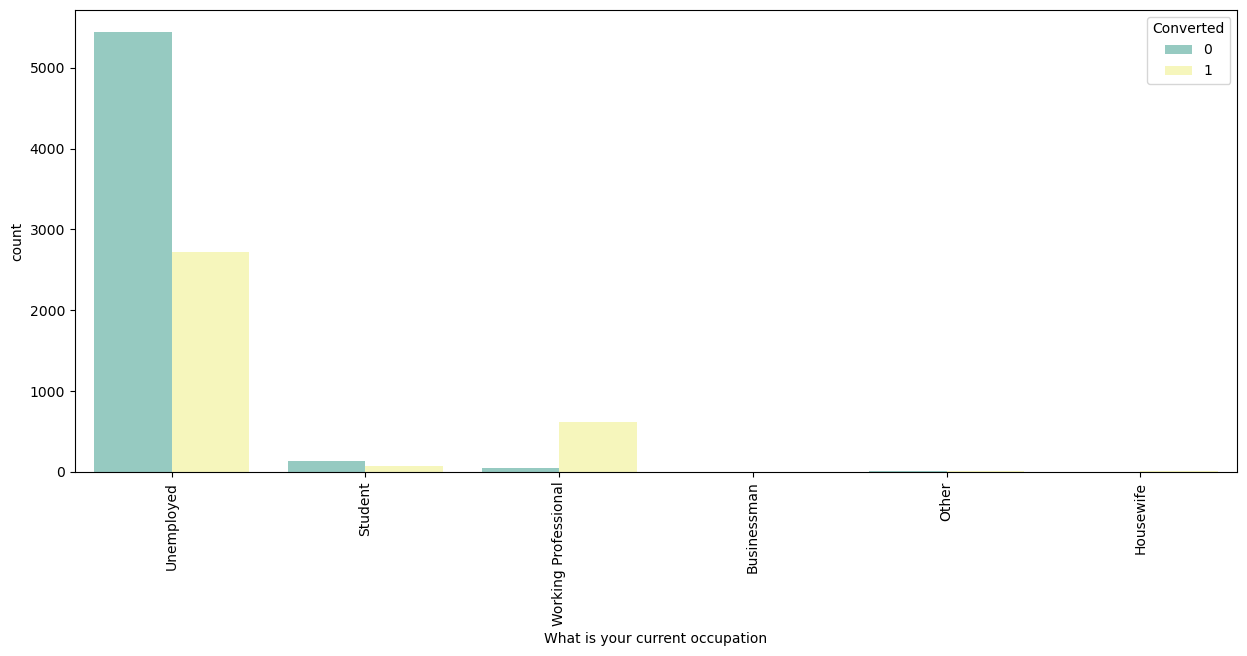

In [59]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### Conclusion

1. Working Professionals going for the course have high chances of joining it.
2. Unemployed leads are the most in numbers but has around 30-35% conversion rate.

#### 13) Search

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

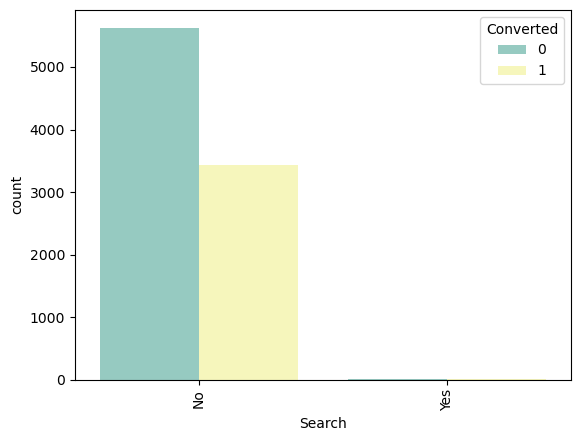

In [60]:
sns.countplot(x = "Search", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### 14) Magazine

(array([0]), [Text(0, 0, 'No')])

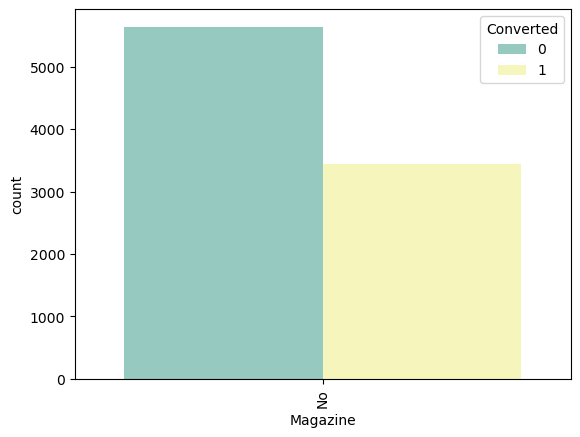

In [61]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### 15) Newspaper Article

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

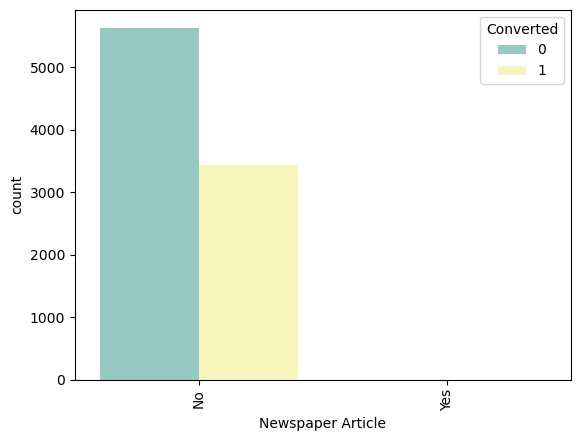

In [62]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### 16) X Education Forums

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

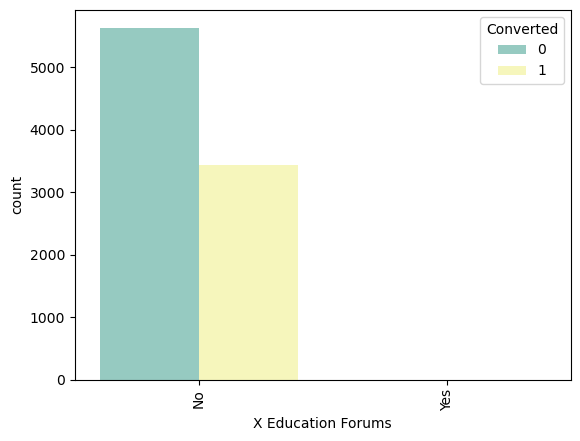

In [63]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### 17) Newspaper

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

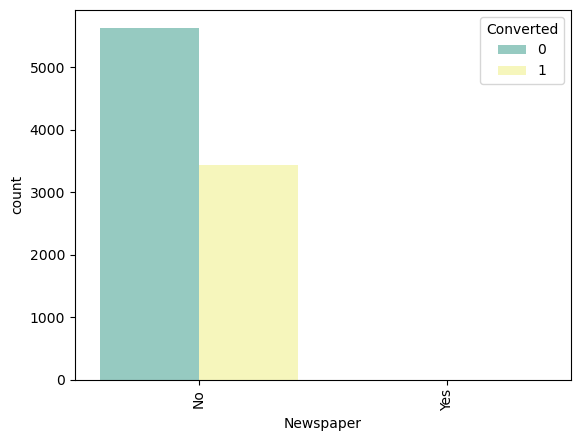

In [64]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### 18) Digital Advertisement

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

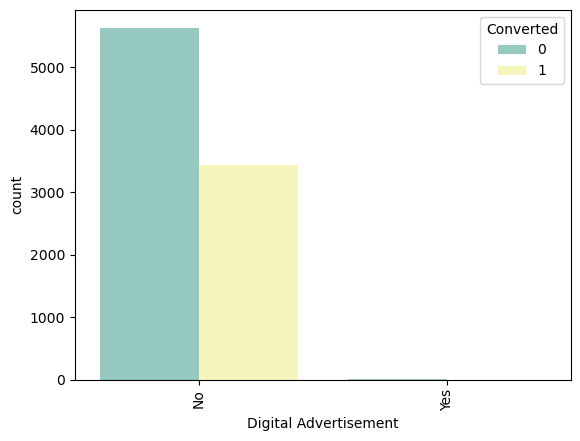

In [65]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### 19) Through Recommendations

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

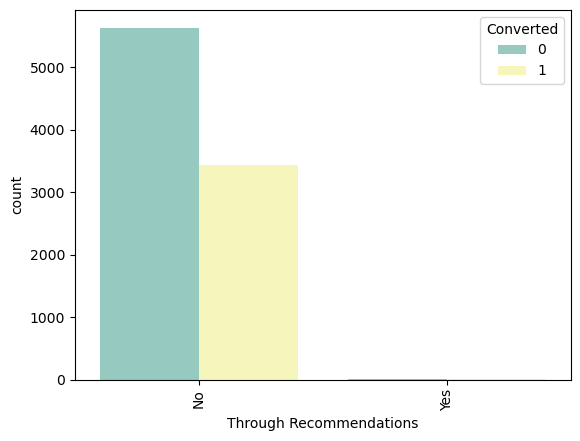

In [66]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### 20) Receive More Updates About Our Courses

(array([0]), [Text(0, 0, 'No')])

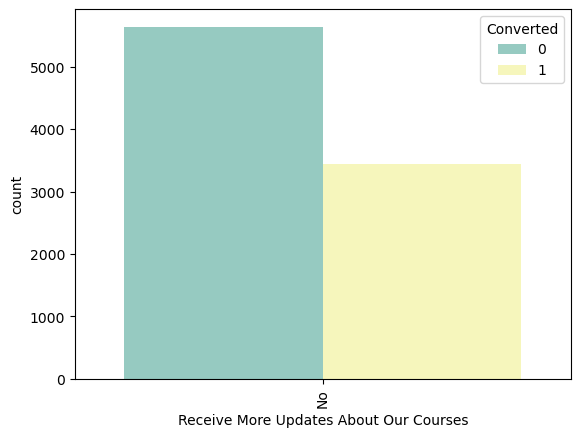

In [67]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### Conclusion

For 13 ro 20, since most entries are 'No'. No conclusion can be drawn.

#### 21) Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

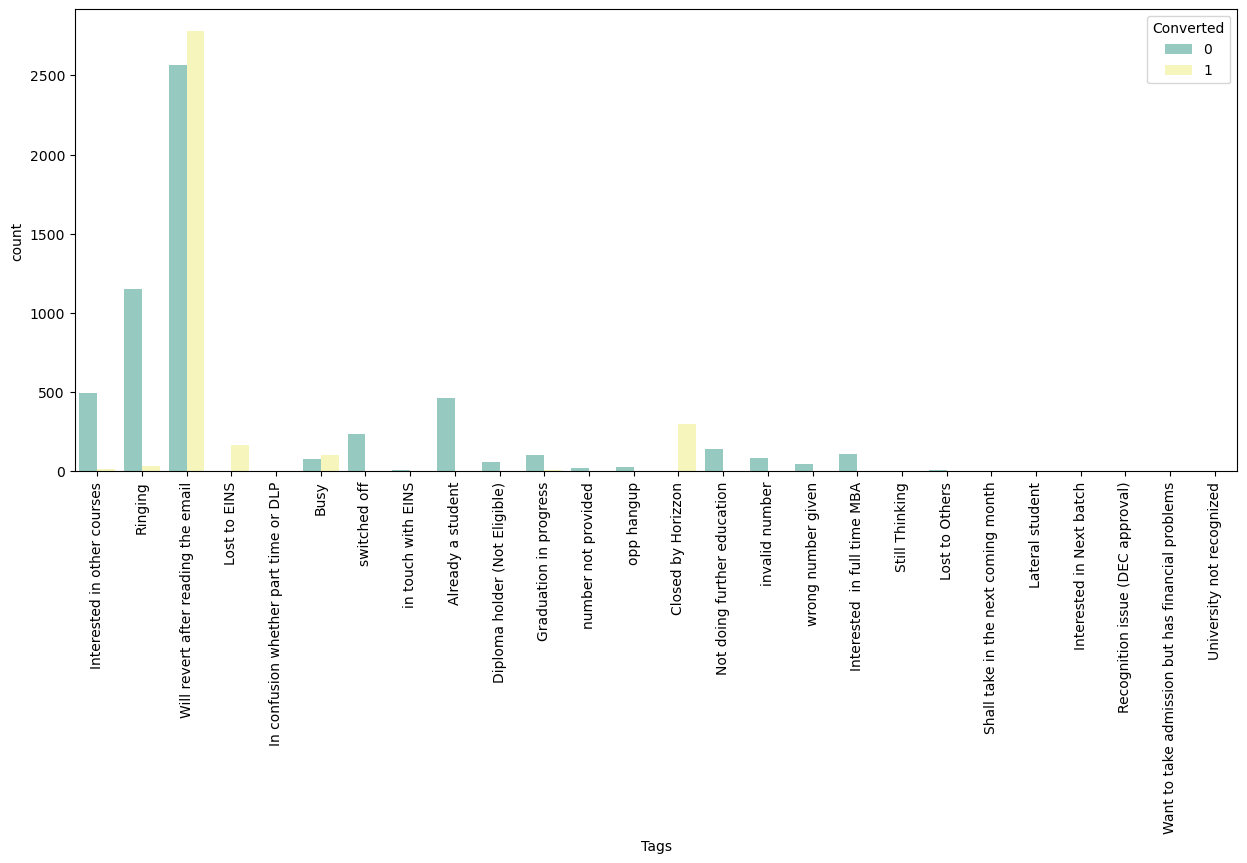

In [68]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### Conclusion

Since this is a column which is generated by the sales team for their analysis, this would not available for model building. We  will therefore need to remove this column.

#### 22) Update me on Supply Chain Content

(array([0]), [Text(0, 0, 'No')])

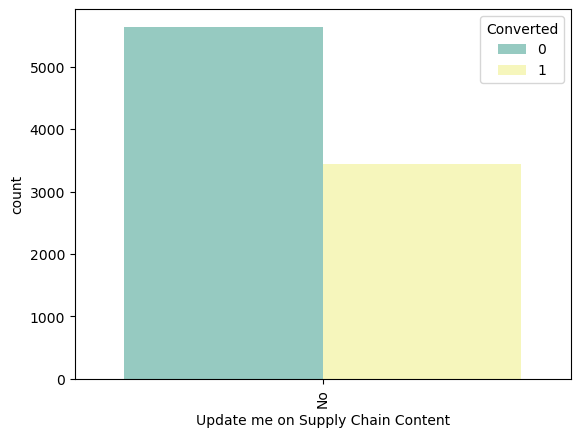

In [69]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### 23) Get updates on DM Content

(array([0]), [Text(0, 0, 'No')])

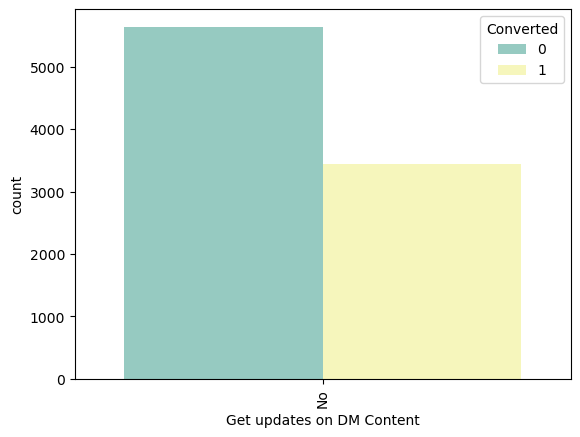

In [70]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### Conclusion

For 22 and 23 most entries are no, so 'No' conclusion can be drawn.

#### 24) City

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

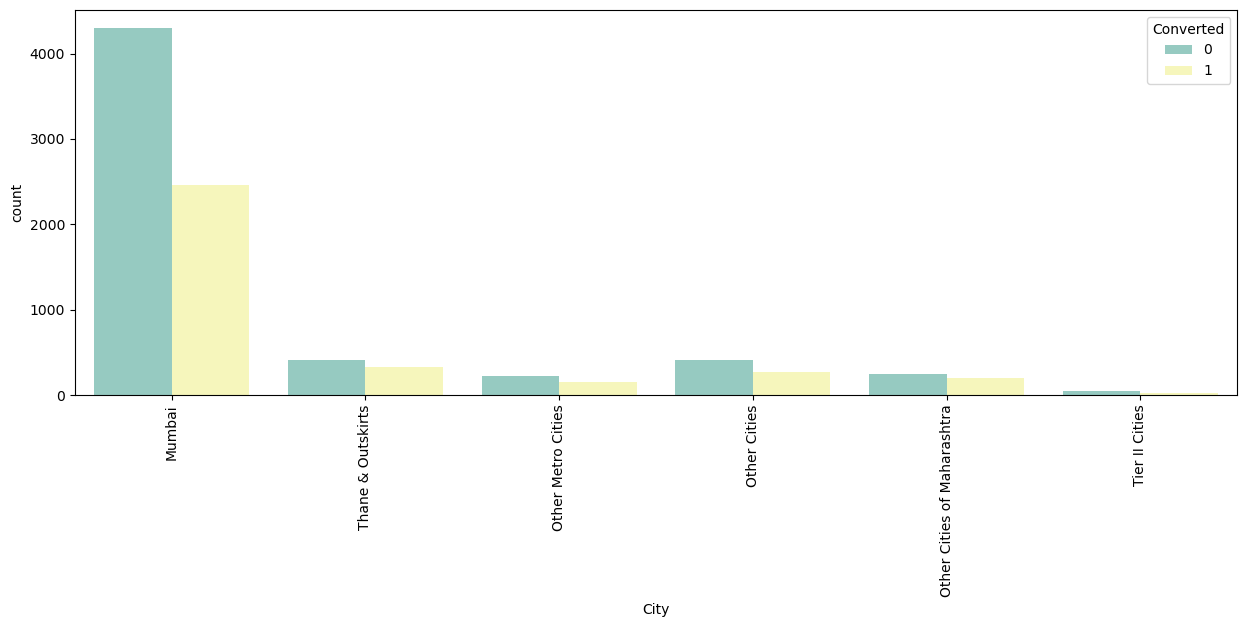

In [71]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### Conclusion

As we can see most leads are from **Mumbai with ~50% conversion rate.**

#### 25) I agree to pay the amount through cheque

(array([0]), [Text(0, 0, 'No')])

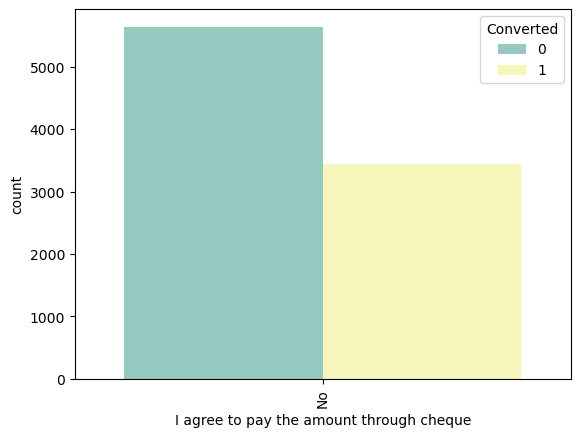

In [72]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### 26) A free copy of Mastering The Interview

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

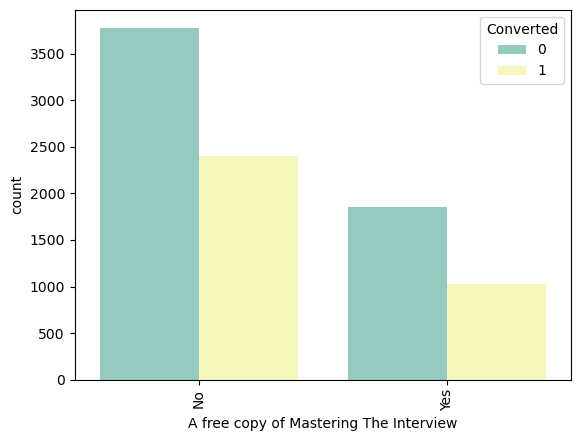

In [73]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### 27) Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

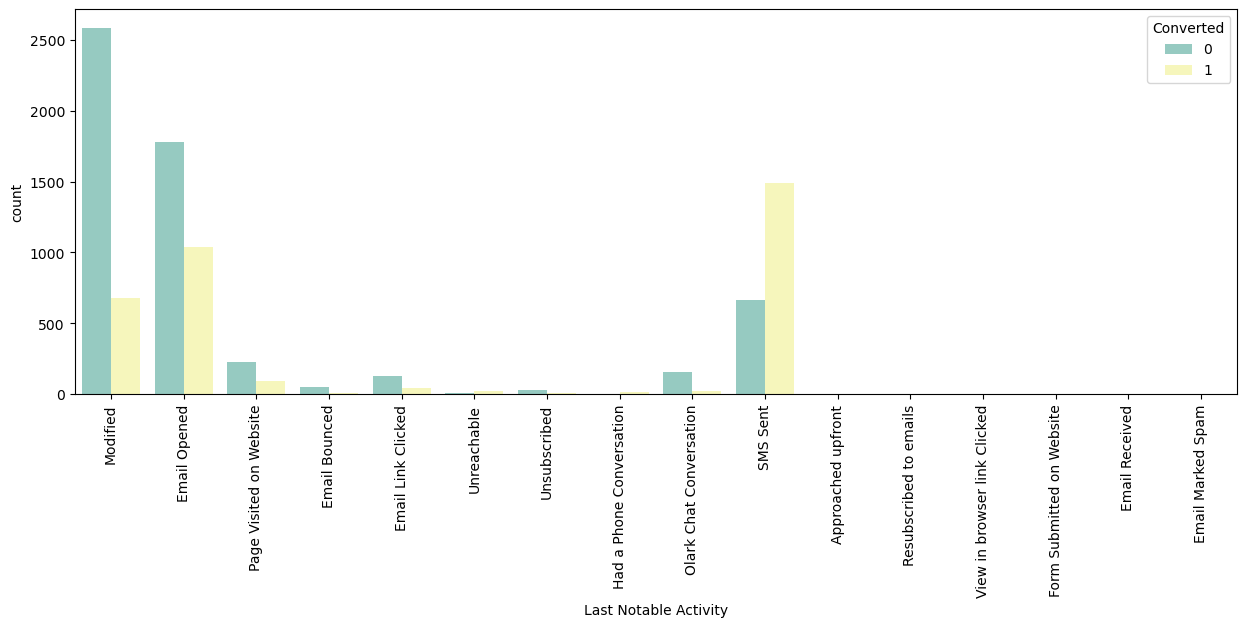

In [74]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data,palette='Set3')
plt.xticks(rotation = 90)

#### Conclusion

Based on the above univariate analysis we conclude that many columns can be dropped, as they don't provide any meaningful information.

In [75]:
lead_data = lead_data.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [76]:
lead_data.shape

(9074, 14)

In [77]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

### Data Preparation

#### 1) Converting some binary variables (Yes/No) to 1/0

In [78]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

#### 2) Creating Dummy variables for the categorical features:

'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [79]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [80]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


**Dropping the columns for which dummies were created**

In [81]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [82]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


#### 3) Splitting the data into train and test set.

In [83]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [84]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [85]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### 4) Scaling the features

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [87]:
# Checking the Lead Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

Conversion rate is ~38%.

### Feature Selection Using RFE

In [88]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming X_train and y_train are your training features and labels respectively
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [89]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
       False, False, False,  True, False, False])

In [90]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 23),
 ('TotalVisits', False, 36),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 44),
 ('Lead Source_Others', False, 39),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 33),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Form Submitted on Website', False, 42),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 28),
 ('Last Activity_SMS Sent', True, 1)

In [91]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model Building

#### Assessing the model with StatsModels

#### Model-1

In [92]:
    import statsmodels.api as sm

In [93]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.0
Date:                Tue, 30 Apr 2024   Deviance:                       5267.9
Time:                        18:43:56   Pearson chi2:                 6.43e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3956
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1554      0.610      0.255      0.799      -1.041       1.351
Do Not Email                                            -1.6981      0.188     -9.017      0.000      -2.067      -1.329
Total Time Spent on Website                              1.1396      0.041     28.083      0.000       1.060       1.219
Lead Origin_Lead Add Form                                2.2408      0.958      2.338      0.019       0.362       4.119
Lead Origin_Lead Import                                  1.4887      0.459      3.245      0.001       0.589       2.388
Lead Source_Olark Chat                                   1.2719      0.104     12.183      0.000       1.067       1.476
Lead Source_Reference                                    1.7579      0.983      1.789      0.074      -0.168       3.684
Lead Source_Welingak Website                             3.7255      1.200      3.105      0.002       1.374       6.077
Last Activity_Olark Chat Conversation                   -0.7765      0.191     -4.058      0.000      -1.152      -0.401
Last Activity_Other_Activity                             1.8822      0.541      3.477      0.001       0.821       2.943
Last Activity_SMS Sent                                   1.2883      0.076     17.038      0.000       1.140       1.436
Last Activity_Unsubscribed                               1.4184      0.479      2.958      0.003       0.479       2.358
What is your current occupation_Housewife               21.4660   1.58e+04      0.001      0.999    -3.1e+04     3.1e+04
What is your current occupation_Student                 -0.9434      0.649     -1.455      0.146      -2.215       0.328
What is your current occupation_Unemployed              -1.3661      0.610     -2.239      0.025      -2.562      -0.170
What is your current occupation_Working Professional     1.3976      0.636      2.198      0.028       0.151       2.644
Last Notable Activity_Email Link Clicked                -0.5072      0.252     -2.014      0.044      -1.001      -0.014
Last Notable Activity_Had a Phone Conversation           1.5546      1.221      1.273      0.203      -0.839       3.949
Last Notable Activity_Modified                          -0.9289      0.084    -11.071      0.000      -1.093      -0.764
Last Notable Activity_Olark Chat Conversation           -0.7171      0.365     -1.964      0.050      -1.433      -0.001
Last Notable Activity_Unreachable                        1.6118      0.476      3.387      0.001       0.679       2.544
========================================================================================================================
"""

Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [94]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

#### Model-2

In [95]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.6
Date:                Tue, 30 Apr 2024   Deviance:                       5271.2
Time:                        18:43:56   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3953
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5635      0.559      1.008      0.313      -0.532       1.659
Do Not Email                                            -1.7013      0.189     -9.024      0.000      -2.071      -1.332
Total Time Spent on Website                              1.1386      0.041     28.077      0.000       1.059       1.218
Lead Origin_Lead Add Form                                2.2397      0.958      2.337      0.019       0.361       4.118
Lead Origin_Lead Import                                  1.4871      0.459      3.241      0.001       0.588       2.386
Lead Source_Olark Chat                                   1.2701      0.104     12.167      0.000       1.065       1.475
Lead Source_Reference                                    1.7629      0.983      1.794      0.073      -0.163       3.689
Lead Source_Welingak Website                             3.7262      1.200      3.105      0.002       1.374       6.078
Last Activity_Olark Chat Conversation                   -0.7770      0.192     -4.057      0.000      -1.152      -0.402
Last Activity_Other_Activity                             1.8836      0.541      3.480      0.001       0.823       2.945
Last Activity_SMS Sent                                   1.2877      0.076     17.030      0.000       1.140       1.436
Last Activity_Unsubscribed                               1.4210      0.479      2.964      0.003       0.481       2.361
What is your current occupation_Student                 -1.3503      0.601     -2.247      0.025      -2.528      -0.173
What is your current occupation_Unemployed              -1.7727      0.559     -3.169      0.002      -2.869      -0.676
What is your current occupation_Working Professional     0.9909      0.587      1.687      0.092      -0.160       2.142
Last Notable Activity_Email Link Clicked                -0.5056      0.251     -2.012      0.044      -0.998      -0.013
Last Notable Activity_Had a Phone Conversation           1.5512      1.221      1.270      0.204      -0.843       3.945
Last Notable Activity_Modified                          -0.9320      0.084    -11.109      0.000      -1.096      -0.768
Last Notable Activity_Olark Chat Conversation           -0.7168      0.365     -1.963      0.050      -1.433      -0.001
Last Notable Activity_Unreachable                        1.6089      0.476      3.379      0.001       0.676       2.542
========================================================================================================================
"""

Since Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high, we can drop this column.

In [96]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

#### Model-3

In [97]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.6
Date:                Tue, 30 Apr 2024   Deviance:                       5273.1
Time:                        18:43:56   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3951
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5675      0.559      1.015      0.310      -0.528       1.663
Do Not Email                                            -1.7042      0.189     -9.027      0.000      -2.074      -1.334
Total Time Spent on Website                              1.1376      0.041     28.063      0.000       1.058       1.217
Lead Origin_Lead Add Form                                2.2384      0.959      2.335      0.020       0.360       4.117
Lead Origin_Lead Import                                  1.4848      0.459      3.236      0.001       0.586       2.384
Lead Source_Olark Chat                                   1.2652      0.104     12.128      0.000       1.061       1.470
Lead Source_Reference                                    1.7614      0.983      1.792      0.073      -0.165       3.688
Lead Source_Welingak Website                             3.7268      1.200      3.105      0.002       1.375       6.079
Last Activity_Olark Chat Conversation                   -0.7699      0.191     -4.021      0.000      -1.145      -0.395
Last Activity_Other_Activity                             2.2889      0.462      4.949      0.000       1.382       3.195
Last Activity_SMS Sent                                   1.2871      0.076     17.022      0.000       1.139       1.435
Last Activity_Unsubscribed                               1.4229      0.480      2.967      0.003       0.483       2.363
What is your current occupation_Student                 -1.3515      0.601     -2.249      0.025      -2.529      -0.174
What is your current occupation_Unemployed              -1.7733      0.559     -3.171      0.002      -2.870      -0.677
What is your current occupation_Working Professional     0.9885      0.587      1.683      0.092      -0.163       2.140
Last Notable Activity_Email Link Clicked                -0.5070      0.251     -2.018      0.044      -1.000      -0.014
Last Notable Activity_Modified                          -0.9394      0.084    -11.213      0.000      -1.104      -0.775
Last Notable Activity_Olark Chat Conversation           -0.7238      0.365     -1.982      0.047      -1.439      -0.008
Last Notable Activity_Unreachable                        1.6060      0.476      3.374      0.001       0.673       2.539
========================================================================================================================
"""

Since Pvalue of 'What is your current occupation_Student' is very high, we can drop this column.

In [98]:
col1 = col1.drop('What is your current occupation_Student')

#### Model-4

In [99]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.3
Date:                Tue, 30 Apr 2024   Deviance:                       5278.5
Time:                        18:43:56   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3946
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5853      0.205     -2.849      0.004      -0.988      -0.183
Do Not Email                                            -1.7016      0.188     -9.034      0.000      -2.071      -1.332
Total Time Spent on Website                              1.1393      0.041     28.112      0.000       1.060       1.219
Lead Origin_Lead Add Form                                2.2401      0.958      2.338      0.019       0.362       4.118
Lead Origin_Lead Import                                  1.4860      0.459      3.239      0.001       0.587       2.385
Lead Source_Olark Chat                                   1.2620      0.104     12.107      0.000       1.058       1.466
Lead Source_Reference                                    1.7720      0.982      1.804      0.071      -0.153       3.698
Lead Source_Welingak Website                             3.7256      1.200      3.105      0.002       1.374       6.077
Last Activity_Olark Chat Conversation                   -0.7713      0.191     -4.033      0.000      -1.146      -0.396
Last Activity_Other_Activity                             2.2873      0.463      4.945      0.000       1.381       3.194
Last Activity_SMS Sent                                   1.2851      0.076     16.992      0.000       1.137       1.433
Last Activity_Unsubscribed                               1.4202      0.479      2.962      0.003       0.480       2.360
What is your current occupation_Unemployed              -0.6209      0.206     -3.014      0.003      -1.025      -0.217
What is your current occupation_Working Professional     2.1401      0.274      7.806      0.000       1.603       2.677
Last Notable Activity_Email Link Clicked                -0.5060      0.251     -2.018      0.044      -0.997      -0.015
Last Notable Activity_Modified                          -0.9347      0.084    -11.174      0.000      -1.099      -0.771
Last Notable Activity_Olark Chat Conversation           -0.7322      0.365     -2.004      0.045      -1.448      -0.016
Last Notable Activity_Unreachable                        1.6123      0.475      3.394      0.001       0.681       2.543
========================================================================================================================
"""

Since Pvalue of 'Lead Source_Reference' is very high, we can drop this column.

In [100]:
col1 = col1.drop('Lead Source_Reference')

#### Model-5

In [101]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.6
Date:                Tue, 30 Apr 2024   Deviance:                       5281.2
Time:                        18:43:56   Pearson chi2:                 6.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3944
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5824      0.205     -2.838      0.005      -0.985      -0.180
Do Not Email                                            -1.6982      0.188     -9.032      0.000      -2.067      -1.330
Total Time Spent on Website                              1.1386      0.041     28.092      0.000       1.059       1.218
Lead Origin_Lead Add Form                                3.9459      0.223     17.686      0.000       3.509       4.383
Lead Origin_Lead Import                                  1.4852      0.459      3.237      0.001       0.586       2.384
Lead Source_Olark Chat                                   1.2595      0.104     12.076      0.000       1.055       1.464
Lead Source_Welingak Website                             2.0180      0.753      2.678      0.007       0.541       3.495
Last Activity_Olark Chat Conversation                   -0.7699      0.191     -4.027      0.000      -1.145      -0.395
Last Activity_Other_Activity                             2.2884      0.462      4.950      0.000       1.382       3.195
Last Activity_SMS Sent                                   1.2856      0.076     17.004      0.000       1.137       1.434
Last Activity_Unsubscribed                               1.4178      0.479      2.958      0.003       0.478       2.357
What is your current occupation_Unemployed              -0.6240      0.206     -3.033      0.002      -1.027      -0.221
What is your current occupation_Working Professional     2.1388      0.274      7.809      0.000       1.602       2.676
Last Notable Activity_Email Link Clicked                -0.5019      0.250     -2.005      0.045      -0.993      -0.011
Last Notable Activity_Modified                          -0.9343      0.084    -11.175      0.000      -1.098      -0.770
Last Notable Activity_Olark Chat Conversation           -0.7317      0.365     -2.003      0.045      -1.448      -0.016
Last Notable Activity_Unreachable                        1.6129      0.475      3.396      0.001       0.682       2.544
========================================================================================================================
"""

Since Pvalue of 'Last Notable Activity_Email Link Clicked' is very high, we can drop this column.

In [102]:
col1 = col1.drop('Last Notable Activity_Email Link Clicked')

#### Checking for VIF values:

In [103]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.63
12,Last Notable Activity_Modified,2.00
6,Last Activity_Olark Chat Conversation,1.92
4,Lead Source_Olark Chat,1.75
8,Last Activity_SMS Sent,1.63
2,Lead Origin_Lead Add Form,1.60
5,Lead Source_Welingak Website,1.33
13,Last Notable Activity_Olark Chat Conversation,1.33
1,Total Time Spent on Website,1.31
11,What is your current occupation_Working Profes...,1.26


In [104]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
col1 = col1.drop('Last Activity_Unsubscribed')

#### Model-6

In [105]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.7
Date:                Tue, 30 Apr 2024   Deviance:                       5293.3
Time:                        18:43:57   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3932
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6031      0.205     -2.946      0.003      -1.004      -0.202
Do Not Email                                            -1.5315      0.174     -8.781      0.000      -1.873      -1.190
Total Time Spent on Website                              1.1397      0.040     28.154      0.000       1.060       1.219
Lead Origin_Lead Add Form                                3.9290      0.223     17.642      0.000       3.493       4.366
Lead Origin_Lead Import                                  1.4963      0.459      3.262      0.001       0.597       2.395
Lead Source_Olark Chat                                   1.2510      0.104     12.037      0.000       1.047       1.455
Lead Source_Welingak Website                             2.0015      0.753      2.660      0.008       0.527       3.476
Last Activity_Olark Chat Conversation                   -0.7597      0.191     -3.976      0.000      -1.134      -0.385
Last Activity_Other_Activity                             2.2900      0.462      4.955      0.000       1.384       3.196
Last Activity_SMS Sent                                   1.2885      0.075     17.245      0.000       1.142       1.435
What is your current occupation_Unemployed              -0.6158      0.205     -3.000      0.003      -1.018      -0.214
What is your current occupation_Working Professional     2.1483      0.273      7.862      0.000       1.613       2.684
Last Notable Activity_Modified                          -0.9264      0.083    -11.133      0.000      -1.089      -0.763
Last Notable Activity_Olark Chat Conversation           -0.7265      0.365     -1.990      0.047      -1.442      -0.011
Last Notable Activity_Unreachable                        1.6233      0.474      3.424      0.001       0.694       2.552
========================================================================================================================
"""

In [106]:
# Dropping the column  'Last Notable Activity_Olark Chat Conversation' because it has high Pvalue
col1 = col1.drop('Last Notable Activity_Olark Chat Conversation')

#### Model-7

In [107]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.8
Date:                Tue, 30 Apr 2024   Deviance:                       5297.5
Time:                        18:43:57   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3928
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6148      0.204     -3.007      0.003      -1.015      -0.214
Do Not Email                                            -1.5382      0.174     -8.840      0.000      -1.879      -1.197
Total Time Spent on Website                              1.1354      0.040     28.119      0.000       1.056       1.215
Lead Origin_Lead Add Form                                3.9209      0.223     17.614      0.000       3.485       4.357
Lead Origin_Lead Import                                  1.4914      0.459      3.252      0.001       0.593       2.390
Lead Source_Olark Chat                                   1.2478      0.104     12.006      0.000       1.044       1.451
Lead Source_Welingak Website                             1.9817      0.752      2.636      0.008       0.508       3.455
Last Activity_Olark Chat Conversation                   -0.9725      0.167     -5.826      0.000      -1.300      -0.645
Last Activity_Other_Activity                             2.2764      0.461      4.935      0.000       1.372       3.181
Last Activity_SMS Sent                                   1.2900      0.075     17.291      0.000       1.144       1.436
What is your current occupation_Unemployed              -0.6131      0.205     -2.990      0.003      -1.015      -0.211
What is your current occupation_Working Professional     2.1541      0.273      7.888      0.000       1.619       2.689
Last Notable Activity_Modified                          -0.8850      0.080    -11.029      0.000      -1.042      -0.728
Last Notable Activity_Unreachable                        1.6318      0.474      3.443      0.001       0.703       2.561
========================================================================================================================
"""

#### Checking for VIF values:

In [108]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.58
11,Last Notable Activity_Modified,1.84
4,Lead Source_Olark Chat,1.75
8,Last Activity_SMS Sent,1.62
2,Lead Origin_Lead Add Form,1.60
6,Last Activity_Olark Chat Conversation,1.56
5,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.31
10,What is your current occupation_Working Profes...,1.25
0,Do Not Email,1.12


In [109]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
col1 = col1.drop('Last Notable Activity_Unreachable')

#### Model-8

In [110]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.8
Date:                Tue, 30 Apr 2024   Deviance:                       5309.7
Time:                        18:43:57   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3917
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6010      0.204     -2.948      0.003      -1.000      -0.201
Do Not Email                                            -1.5410      0.174     -8.859      0.000      -1.882      -1.200
Total Time Spent on Website                              1.1312      0.040     28.085      0.000       1.052       1.210
Lead Origin_Lead Add Form                                3.9114      0.222     17.584      0.000       3.475       4.347
Lead Origin_Lead Import                                  1.4723      0.458      3.211      0.001       0.574       2.371
Lead Source_Olark Chat                                   1.2373      0.104     11.932      0.000       1.034       1.441
Lead Source_Welingak Website                             1.9777      0.752      2.631      0.009       0.504       3.451
Last Activity_Olark Chat Conversation                   -0.9790      0.167     -5.869      0.000      -1.306      -0.652
Last Activity_Other_Activity                             2.2632      0.461      4.907      0.000       1.359       3.167
Last Activity_SMS Sent                                   1.2737      0.074     17.129      0.000       1.128       1.419
What is your current occupation_Unemployed              -0.6056      0.204     -2.962      0.003      -1.006      -0.205
What is your current occupation_Working Professional     2.1658      0.273      7.945      0.000       1.631       2.700
Last Notable Activity_Modified                          -0.8972      0.080    -11.204      0.000      -1.054      -0.740
========================================================================================================================
"""

Since most of the PValues are very low we can stop here

####    Checking for VIF values:

In [111]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.56
11,Last Notable Activity_Modified,1.84
4,Lead Source_Olark Chat,1.75
8,Last Activity_SMS Sent,1.61
2,Lead Origin_Lead Add Form,1.60
6,Last Activity_Olark Chat Conversation,1.56
5,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.31
10,What is your current occupation_Working Profes...,1.25
0,Do Not Email,1.12


**Since VIF values are low for all the variables, model-8 is our final model. We have 11 variables in our final model.**

#### Making Prediction on the Train set

In [112]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.199748
1012    0.357313
9226    0.354796
4750    0.872812
7987    0.810353
1281    0.751034
2880    0.099431
4971    0.902100
7536    0.869160
1248    0.781039
dtype: float64

In [113]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19974754, 0.35731282, 0.35479605, 0.87281151, 0.81035301,
       0.7510342 , 0.09943124, 0.90209976, 0.86916041, 0.78103937])

#### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [114]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.199748,3009
1,0,0.357313,1012
2,0,0.354796,9226
3,1,0.872812,4750
4,1,0.810353,7987


### Choosing arbitrary cut-off probability point of 0.5 to find the predicted labels

**Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [115]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.199748,3009,0
1,0,0.357313,1012,0
2,0,0.354796,9226,0
3,1,0.872812,4750,1
4,1,0.810353,7987,1


### Making the Confusion matrix

In [116]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3481  424]
 [ 743 1703]]


In [117]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8162494095418045


### Metrics beyond simply accuracy

In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.696238757154538


In [120]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8914212548015364


In [121]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.10857874519846351


In [122]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.8006582040432534


In [123]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8241003787878788


We can conclude that the specificity is good (~89%) but sensitivity was only ~70%. Will need to check this.

We have got sensitivity at ~70% as the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point has to be optimised in order to get a decent value of sensitivity so we can use the ROC curve.

### Plotting the ROC Curve

In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

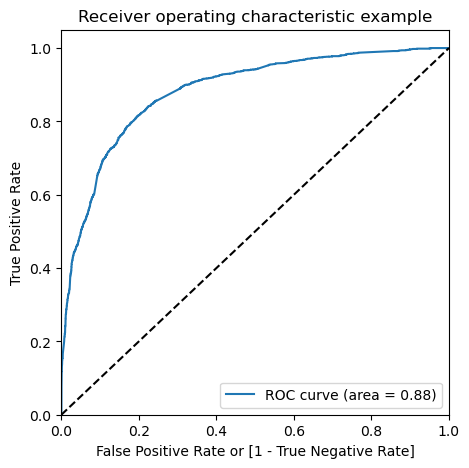

In [126]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

**Since ouor area under the ROC curve is 0.88, therefore we can conclude our model is good.**

#### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

In [127]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.199748,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.357313,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.354796,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.872812,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.810353,7987,1,1,1,1,1,1,1,1,1,1,0


In [128]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.584160  0.973017  0.340589
0.2   0.2  0.744292  0.912919  0.638668
0.3   0.3  0.798142  0.842600  0.770294
0.4   0.4  0.813258  0.764105  0.844046
0.5   0.5  0.816249  0.696239  0.891421
0.6   0.6  0.793418  0.587490  0.922407
0.7   0.7  0.778303  0.508585  0.947247
0.8   0.8  0.760195  0.423140  0.971319
0.9   0.9  0.711069  0.267375  0.988988


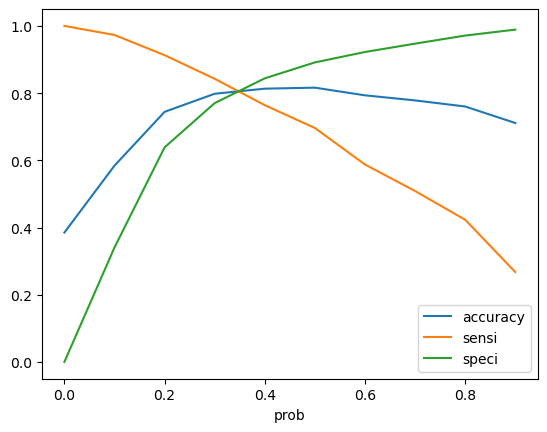

In [129]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [130]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.199748,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.357313,1012,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.354796,9226,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.872812,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.810353,7987,1,1,1,1,1,1,1,1,1,1,0,1


#### Assigning Lead Score to the Training data

In [131]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.199748,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.357313,1012,0,1,1,1,1,0,0,0,0,0,0,1,36
2,0,0.354796,9226,0,1,1,1,1,0,0,0,0,0,0,1,35
3,1,0.872812,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.810353,7987,1,1,1,1,1,1,1,1,1,1,0,1,81


### Model Evaluation

In [132]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7981420248779719


In [133]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3008,  897],
       [ 385, 2061]], dtype=int64)

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8426001635322976


In [136]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7702944942381562


In [137]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.2297055057618438


In [138]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.6967545638945233


In [139]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8865310934276451


### Precision and Recall


In [140]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3481,  424],
       [ 743, 1703]], dtype=int64)

In [141]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.8006582040432534


In [142]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.696238757154538


In [143]:
from sklearn.metrics import precision_score, recall_score

In [144]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.8006582040432534


In [145]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.696238757154538


**Precision and recall tradeoff**

In [146]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [147]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Making predictions on the test set

#### Scaling the test data

In [148]:
print(X_test.columns)

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE

In [149]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [150]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified
3271,0,-0.600595,0,0,0,0,0,0,0,1,0,0
1490,0,1.887326,0,0,0,0,0,0,0,0,1,0
7936,0,-0.752879,0,0,0,0,0,0,0,1,0,0
4216,0,-0.888650,1,0,0,0,0,0,0,0,0,1
3830,0,-0.587751,0,0,0,0,0,0,0,1,0,0


In [151]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.131701
1490    0.975870
7936    0.113219
4216    0.803457
3830    0.133371
1800    0.672014
6507    0.338396
4821    0.310808
4223    0.951350
4714    0.354796
dtype: float64

In [152]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [153]:
# Let's see the head
y_pred_1.head()

,0
3271,0.131701
1490,0.975870
7936,0.113219
4216,0.803457
3830,0.133371


In [154]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [155]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [156]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [158]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.131701
1,1,1490,0.975870
2,0,7936,0.113219
3,1,4216,0.803457
4,0,3830,0.133371


In [159]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [160]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [161]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.131701
1,1490,1,0.975870
2,7936,0,0.113219
3,4216,1,0.803457
4,3830,0,0.133371


In [162]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [163]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.131701,0
1,1490,1,0.975870,1
2,7936,0,0.113219,0
3,4216,1,0.803457,1
4,3830,0,0.133371,0


In [164]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8009548292324642


In [165]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1402,  332],
       [ 210,  779]], dtype=int64)

In [166]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [167]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7876643073811931


In [168]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8085351787773933


#### Assigning Lead Score to the Testing data

In [169]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.131701,0,13
1,1490,1,0.975870,1,98
2,7936,0,0.113219,0,11
3,4216,1,0.803457,1,80
4,3830,0,0.133371,0,13


### Observations:
After running the model on the Test Data , we obtain:

Accuracy : 80.1 %
Sensitivity : 78.8 %
Specificity : 80.9 %

### Results :

1) Comparing the values obtained for Train & Test:

Train Data:

Accuracy : 78.8 %
Sensitivity : 84.2 %
Specificity : 77.0 %

Test Data:

Accuracy : 80.1 %
Sensitivity : 78.8 %
Specificity : 80.9 %

**Therefore we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.**

2) Finding out the leads which should be contacted:

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [170]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.975870,1,98
8,4223,1,0.951350,1,95
21,2461,1,0.992973,1,99
23,5822,1,0.996810,1,100
25,2684,1,0.996810,1,100
...,...,...,...,...,...
2694,1566,1,0.958326,1,96
2699,6461,1,0.890335,1,89
2703,5741,1,0.914528,1,91
2715,6299,1,0.880004,1,88


So there are 370 leads which can be contacted and have a high chance of getting converted:

In [171]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4223, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518, 4543,
       4830, 4365, 3542, 7674, 8596, 4003, 4963, 6947, 4807,  446,  789,
       8372, 5805, 3758,  337, 1561,  737, 9034, 6423, 8286, 7174, 4461,
       1436, 7552, 3932, 4080, 1475, 5785, 1867, 2860, 7253, 4297, 5490,
       1995, 6532, 4498, 5797, 8687, 7653,   76, 2018, 3307, 3976, 5769,
       1663, 3288, 8959, 7521, 8282, 8213, 9063, 5292, 6913, 1481, 3265,
       3285, 3858, 8106, 8207,  373, 7417, 4179, 8568, 7268, 5141, 6784,
       6754, 7236, 2960, 7753, 3983,  802, 8745, 4717,  505, 8509, 6094,
       4992, 7036, 2680, 7065,  112, 6149, 7157, 3827, 7175, 1675, 6999,
       5826, 6499, 2481, 3439, 4612, 4793, 2495,  822, 8111, 2378, 5090,
       5075, 7699, 5638, 2342, 8077, 2727,  720,  941, 2961, 1542, 5656,
       2630, 6728, 8205, 6332, 8461, 5135, 2427, 5087,  174, 2674, 8065,
       1568, 8597, 4865, 4708, 1304, 6066, 6538, 5700, 1388, 5815, 7970,
       7902, 5804, 5042, 4081, 6684, 1927, 5032, 58

3) Finding out the Important Features from our final model:

In [172]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.911423
Last Activity_Other_Activity                            2.263171
What is your current occupation_Working Professional    2.165797
Lead Source_Welingak Website                            1.977666
Lead Origin_Lead Import                                 1.472309
Last Activity_SMS Sent                                  1.273667
Lead Source_Olark Chat                                  1.237326
Total Time Spent on Website                             1.131239
const                                                  -0.600952
What is your current occupation_Unemployed             -0.605635
Last Notable Activity_Modified                         -0.897154
Last Activity_Olark Chat Conversation                  -0.979036
Do Not Email                                           -1.540968
dtype: float64

### Recommendations:

1. The company should make calls to the leads coming from the lead sources "Lead Origin_Lead Add Form", "Last Activity_Other Activity" and "What is your current occupation_Working Professional" as these are more likely to get converted.
2. Other categories like "Lead Source_Welingak Website", "Lead Origin_Lead Import", "Last Activity_SMS Sent", "Lead Source_Olark Chat" and "Total Time Spent on Website" are also likely to get converted.
3. The company should not make calls to "const", "What is your current occupation_Unemployed", "Last Notable Activity_Modified", "Last Activity_Olark Chat Conversation" and "Do Not Email"